# DEPARTMENT OF EPIDEMIOLOGY STATISTICS & INFORMATICS 1st KEMRI Data Re-use Hackathon Challenge 2022
## Table of Contents
* [Introduction](#Chapter_1_Introduction)
    * [Objectives](#Objecives)
* [Import necessary libraries and data](#chapter-2-import-necessary-libraries-and-load-the-data)
* [Hypothesis](#Hypothesis)
* [Procurement](#Procurement)

# Chapter 1: Introduction
The purpose of this notebook is to perform data analysis on a dataset containing information about customer satisfaction at a healthcare organization. The dataset includes a variety of variables such as the department visited, age, gender, and overall satisfaction of the customer. Our goal is to understand the factors that influence customer satisfaction and identify areas for improvement.

## Objectives
- Identifying patterns and trends in the data
- Predicting future outcomes or identifying potential risks
- Testing hypotheses or evaluating the effectiveness of interventions
- Describing the characteristics of a population or identifying segments within a population
- Improving business processes or decision-making
- Exploring new lessons to re-engineer organization business units using customer satisfaction data to improve processes of internal organization

# Chapter 2: Import necessary libraries and load the data
 - Libraries reduce coding errors

In [3]:
import pandas as pd #library for data manipulation
import numpy as np # library for working with arrays

# creating visualizations in Python
import matplotlib.pyplot as plt
import plotly.express as px
from pylab import rcParams
import seaborn as sns
sns.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# import modelling libraries
#from catboost import CatBoostClassifier
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier 

#from sklearn.metrics import log_loss, classification_report, confusion_matrix
#from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RepeatedStratifiedKFold

#pd.options.display.max_rows=2000
#pd.set_option('max_columns', None)

In [4]:
# import data
df = pd.read_excel('KEMRI Hackathon Organization Customer Satisfaction dataset.xlsx', parse_dates=True, index_col='Date')

In [5]:
# read a sample of the data
df.sample(5)

,Serial_number,Department_visited,Gender,Age,Organisation_represented,Reception_at_the_gate,Services_at_the_reception_area,Reception_area_facilities,Proffessionalism,General_presentation,...,Procurement,Scientific,Academic Attachments,Information Requesting,Others Services,Any_problems_encountered_explain_if_yes,Overall_satisfaction,REFER_SOMEBODY_KEMRI,Coment,How_to_improve_services
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,C47,KEMRI CENTRAL LABORATORIES,Female,20,Public University,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,...,0,0,1,0,NaN,NO,Unsatissfied,NO,There should be free medication to the student...,Arrange for lessons for all students on attach...
2018-09-25,kemri_134,KEMRI KENYATTA HOSPITAL BASED LABORATORIES,Female,27,Service Provider,Satisfied,Dissatisfied,Satisfied,Satisfied,Satisfied,...,0,0,0,0,NaN,No,Satisfied,YES,NaN,BY ATTENDING TO THE CLIENTS APPROPRIATELY FOR ...
2016-04-25,C66,KEMRI KENYATTA HOSPITAL BASED LABORATORIES,Male,35,NGO,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,...,0,0,0,0,NaN,No,Satisfied,YES,Satisfied,By employing more staff
2015-09-30,kemri_135,KEMRI KENYATTA HOSPITAL BASED LABORATORIES,Female,28,Did not disclose,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,...,0,1,0,0,NaN,No,Satisfied,YES,Well guided on my request and need,Putting sign boards for easy access of direction
2015-09-18,kemri_199,ADMINISTRATION OFFICES,Female,38,NGO,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,...,0,0,0,0,NaN,NO,Satisfied,YES,No comments,NaN


In [6]:
# check the number of rows and columns in the dataset
df.shape

(297, 26)


- The dataset has 297 rows and 27 columns

In [7]:
# list all the available columns
df.columns

Index(['Serial_number', 'Department_visited', 'Gender', 'Age',
       'Organisation_represented', 'Reception_at_the_gate',
       'Services_at_the_reception_area', 'Reception_area_facilities',
       'Proffessionalism', 'General_presentation', 'Efficiency',
       'Quality_of_advice_received', 'Knowledge_of_staff_on_products',
       'Recomendation_on_KEMRI_products', 'Diagnostic ', 'Payments ',
       'Procurement', 'Scientific', 'Academic Attachments',
       'Information Requesting', 'Others Services',
       'Any_problems_encountered_explain_if_yes', 'Overall_satisfaction',
       'REFER_SOMEBODY_KEMRI', 'Coment', 'How_to_improve_services'],
      dtype='object')

In [8]:
# what we are trying to predict
print(df['Overall_satisfaction'].unique())

['Satisfied' 'Extremely Satified' 'Somewhat' 'Extremely satisfied'
 'Extremely Unsatisfied' 'Unsatissfied']


In [9]:
df['Overall_satisfaction'] = df['Overall_satisfaction'].str.replace('Extremely Satified', 'Extremely satisfied')
print(df['Overall_satisfaction'].unique())

['Satisfied' 'Extremely satisfied' 'Somewhat' 'Extremely Unsatisfied'
 'Unsatissfied']


### DATATYPE DESCRIPTION AND  STATISTICAL INFORMATION

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 297 entries, 2015-08-26 to 2015-10-02
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Serial_number                            297 non-null    object
 1   Department_visited                       297 non-null    object
 2   Gender                                   297 non-null    object
 3   Age                                      297 non-null    int64 
 4   Organisation_represented                 297 non-null    object
 5   Reception_at_the_gate                    297 non-null    object
 6   Services_at_the_reception_area           297 non-null    object
 7   Reception_area_facilities                297 non-null    object
 8   Proffessionalism                         297 non-null    object
 9   General_presentation                     297 non-null    object
 10  Efficiency                               29

- There is a mixture of categorical and quantitative columns 
- Categorical columns dominate

In [11]:
# describe the continuous variables
df.describe()

,Age,Diagnostic,Payments,Procurement,Scientific,Academic Attachments,Information Requesting
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,29.255892,0.202020,0.037037,0.070707,0.131313,0.350168,0.087542
std,7.545482,0.402185,0.189171,0.256768,0.338313,0.477828,0.283105
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,61.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 
- From the above, no outliers detected in our dataset

### Missing values

In [12]:
# df.isnull().sum() * 100/len(df)
missing_perc = df.isnull().mean()*100

In [13]:
missing_values = pd.DataFrame({'column_name' : df.columns, 'Missing Percentage' : missing_perc})
missing_values

,column_name,Missing Percentage
Serial_number,Serial_number,0.000000
Department_visited,Department_visited,0.000000
Gender,Gender,0.000000
Age,Age,0.000000
Organisation_represented,Organisation_represented,0.000000
Reception_at_the_gate,Reception_at_the_gate,0.000000
Services_at_the_reception_area,Services_at_the_reception_area,0.000000
Reception_area_facilities,Reception_area_facilities,0.000000
Proffessionalism,Proffessionalism,0.000000
General_presentation,General_presentation,0.000000



- In Others Services column, 56% of the data is missing
- In Coment column, 40% of the data is missing
- In How_to_improve_services, 46% of the data is missing
- In Recomendation_on_KEMRI_products, 0.34% of the data is missing

### Fill the missing values with the most frequent
- fill with the most frequent. We will fill them since the dataset is small to avoid missing some important information

In [14]:
cols_to_fill = ['How_to_improve_services', 'Coment', 'Others Services', 'Recomendation_on_KEMRI_products']
for col in cols_to_fill:
    df[col] = df[col].fillna(df[col].mode()[0])

In [15]:
# confirm missing values
df.isna().sum()

Serial_number                              0
Department_visited                         0
Gender                                     0
Age                                        0
Organisation_represented                   0
Reception_at_the_gate                      0
Services_at_the_reception_area             0
Reception_area_facilities                  0
Proffessionalism                           0
General_presentation                       0
Efficiency                                 0
Quality_of_advice_received                 0
Knowledge_of_staff_on_products             0
Recomendation_on_KEMRI_products            0
Diagnostic                                 0
Payments                                   0
Procurement                                0
Scientific                                 0
Academic Attachments                       0
Information Requesting                     0
Others Services                            0
Any_problems_encountered_explain_if_yes    0
Overall_sa


- The dataset is now clean

In [16]:
# duplicated values
df.duplicated().sum()

0


 No duplicates in our dataset

### Quality mapping
- We realised The values in the `Any_problems_encountered_explain_if_yes` column appear to be a mix of categorical values ("Yes", "No", etc.) and free-form text responses. The free form text are still binary in nature and we need to convert them to categorical values.

In [17]:
print(*df['Any_problems_encountered_explain_if_yes'].unique(), sep='\n')

NO
No
Yes
no
yes
YES
yes, I was reffered to KEMRI Headquaters
yes Delay of payments it is abot slow
Yes, Time at the institute from start
YES. Excellent
yes-A lot of time taken in pharmacy
Yes. My attachment should end on July according to my calling letter.Why is it up to end of September? And we should go back to school.If so,we should be paid for August for school pocket money.


In [18]:
import re
def clean_text(text):
    text = text.lower()
    # Check first word using regex
    if re.match(r'^yes', text):
        text = 'Yes'
    text = text.replace('yes', 'Yes')
    text = text.replace('no', 'No')
    return text

df['problem_encountered'] = df['Any_problems_encountered_explain_if_yes'].apply(clean_text)
print("Final unique values:")
print(*df['problem_encountered'].unique(), sep='\n')

Final unique values:
No
Yes


- In the `Other_services` column, we notice that the common services are as follows
    - Looking for job
    - HIV LAB
    - Interview
    - Student Assessment
    - Visiting staff/friend
    - Attachment

In [19]:
df['Others Services'].unique()

array([0, '1', 'OTHERS', 'HIV LAB', 'FOOD HANDLING CERTIFICATE',
       'looking for a job', 'visiting staff at administration',
       'attachment', 'visited a staff', 'Visiting HIV laboratory',
       'Consultation', 'Wanted to see a friend', 'job vacancy', 'Others',
       'Employment application', 'Introduction to our financial services',
       'Interview', 'interviews', 'interview', 'Job', 'INTERVIEW', 'JOB',
       'Student assessment'], dtype=object)

- We will categorize text with job as `job seeking`

In [20]:
def clean_services(text):
    # if data is not a string, return it
    if not isinstance(text, str):
        if 0 == text or 1 == text:
            return 'others'
    text = text.lower()
    if 'interview' in text:
        text = 'Interview'
    elif 'job' in text:
        text = 'job seeking'
    elif 'employment' in text:
        text = 'job seeking'
    elif 'friend' in text:
        text = 'visit staff'
    elif 'visit' in text:
        text = 'visit staff'
    elif '1' in text:
        text = 'others'
    
    return text

df['Others Services'] = df['Others Services'].apply(clean_services)
df['Others Services'].unique()

array(['others', 'hiv lab', 'food handling certificate', 'job seeking',
       'visit staff', 'attachment', 'consultation',
       'introduction to our financial services', 'Interview',
       'student assessment'], dtype=object)

# Hypothesis
### Department visited
  -  The level of satisfaction will defer from one department to another
### Gender
  -  Gender may not really affect ones level of satisfaction
### Age
 -   Age may not really affect ones level of satisfaction
### Organization represented
 -   Ones organization may not determine the level of satisfaction
### Gates reception
 -   The level of satisfaction of customer was extremely high when the reception at the gate was satisfying
### Services at the reception area
 -   The level of satisfaction of customer was extremely high when the services at the reception area was satisfying
### Reception area facilities
 -   The level of satisfaction of customer was extremely high when the facilities at the reception area was satisfying
### Professionalism
  - Most people were satisfied if the level of professionalism was high
### General_presentation
  - Most people were satisfied if general presentation of staff was high
### Efficiency
  - Most people were satisfied if the level of efficiency was high
### Quality_of_advice_received
  - The level of satisfaction of customer was Extremely Satisfied when quality of advice received was very satisfying
### Knowledge_of_staff_on_products 
  - The level of satisfaction of customer was extremely satisfied when Staff has a deep knowledge of products
### Recomendation_on_KEMRI_products
  - The level of satisfaction of customer was extremely satisfied, satisfied if this corresponds to a customer recommending products to others

In [21]:
# check number of unique values in dataset
# df.apply(lambda x: x.nunique())
df.columns

Index(['Serial_number', 'Department_visited', 'Gender', 'Age',
       'Organisation_represented', 'Reception_at_the_gate',
       'Services_at_the_reception_area', 'Reception_area_facilities',
       'Proffessionalism', 'General_presentation', 'Efficiency',
       'Quality_of_advice_received', 'Knowledge_of_staff_on_products',
       'Recomendation_on_KEMRI_products', 'Diagnostic ', 'Payments ',
       'Procurement', 'Scientific', 'Academic Attachments',
       'Information Requesting', 'Others Services',
       'Any_problems_encountered_explain_if_yes', 'Overall_satisfaction',
       'REFER_SOMEBODY_KEMRI', 'Coment', 'How_to_improve_services',
       'problem_encountered'],
      dtype='object')

### EXPLORATORY DATA ANALYSIS

## Overall satisfaction

In [22]:
percentage_sat = df['Overall_satisfaction'].value_counts(normalize=True)*100
total_count = df['Overall_satisfaction'].value_counts()
percent_total = pd.DataFrame({'Number_of_people' : total_count, 'Percentage' : percentage_sat})
percent_total

,Number_of_people,Percentage
Satisfied,195,65.656566
Extremely satisfied,87,29.292929
Somewhat,12,4.040404
Unsatissfied,2,0.673401
Extremely Unsatisfied,1,0.336700


<Figure size 2160x1080 with 0 Axes>

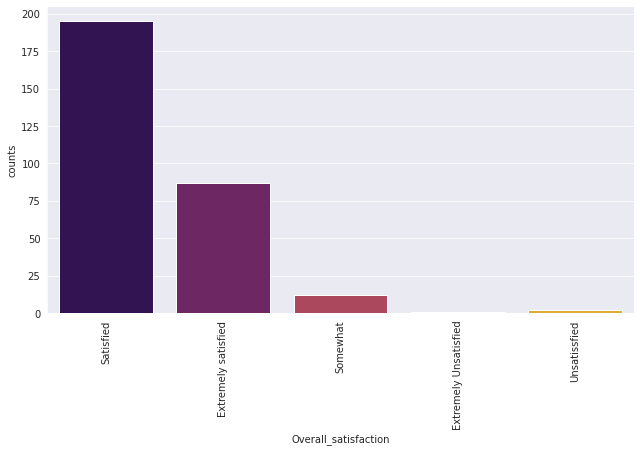

In [23]:
plt.figure(figsize=(30,15))
sns.catplot(x='Overall_satisfaction', data=df, 
            palette="inferno", kind="count", dodge=True, orient="v", height=5, aspect=1.8)
plt.ylabel('counts')
plt.xticks(rotation=90)
plt.xlabel('Overall_satisfaction')
plt.show()

####  From the data, most people seem to have been satisfied from the services offered at KEMRI
      - It should be noted that this dataset is imbalanced i.e One class is dominating the others

### Department Visited 

In [24]:
percentage_visit = df['Department_visited'].value_counts(normalize=True)*100
total_count = df['Department_visited'].value_counts()
percent_total = pd.DataFrame({'Number_of_people' : total_count, 'Percentage' : percentage_visit})
percent_total

,Number_of_people,Percentage
KEMRI CENTRAL LABORATORIES,100,33.670034
KEMRI KENYATTA HOSPITAL BASED LABORATORIES,76,25.589226
ADMINISTRATION OFFICES,72,24.242424
TRAINING CENTER,15,5.050505
IDEAL Studentship,6,2.020202
Research Partners Laboratory,6,2.020202
Phd students internship,3,1.010101
OUTPATIENT SERVICES AT KEMRI RESEARCH CLINIC,3,1.010101
ATTACHMENT,3,1.010101
KEMRI COAST BASED LABORATORIES,3,1.010101


<Figure size 2160x1080 with 0 Axes>

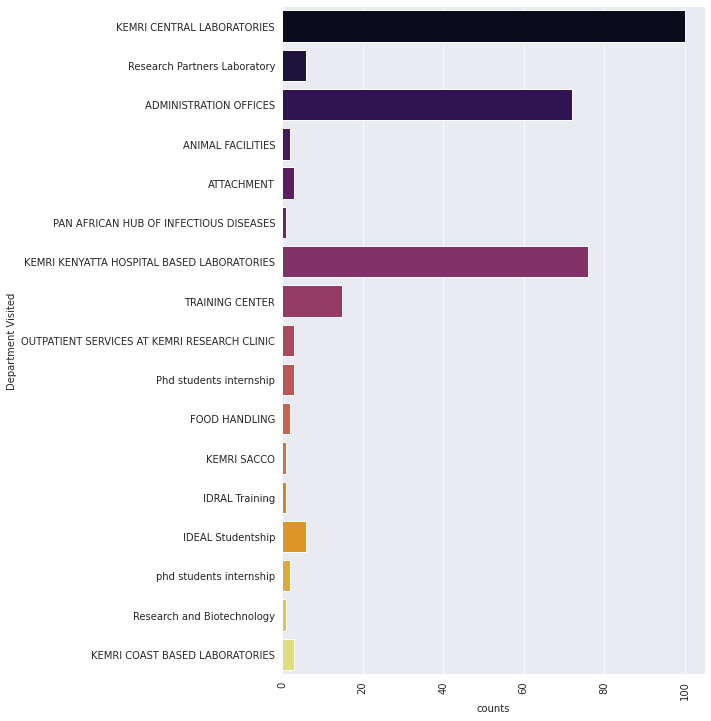

In [25]:
plt.figure(figsize=(30,15))
sns.catplot(y='Department_visited', data=df, 
            palette="inferno", kind="count", dodge=True, orient="v", height=10, aspect=1)
plt.ylabel('Department Visited')
plt.xticks(rotation=90)
plt.xlabel('counts')
plt.show()

### 
From the above analysis, KEMRI CENTRAL LABORATORIES was the most visited department at KEMRI, followed by KEMRI KENYATTA HOSPITAL BASED LABORATORIES and ADMINISTRATION OFFICES respectively ...


PAN AFRICAN HUB OF INFECTIOUS DISEASES, Research and Biotechnology, KEMRI SACCO and IDRAL Training departments were the least visited departments each with 1 customer 

### Relationship between Department Visited and Overall Satisfaction

<Figure size 720x360 with 0 Axes>

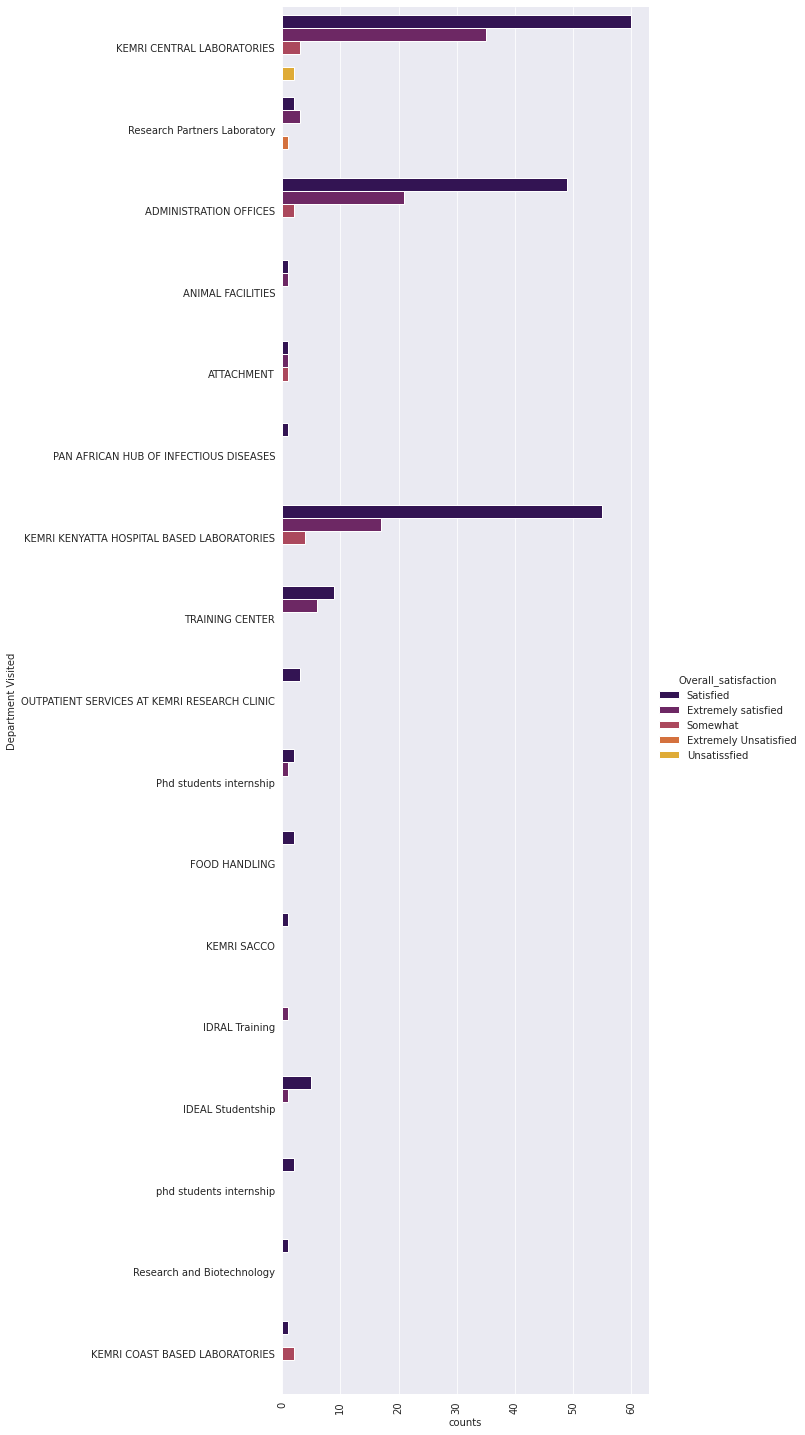

In [26]:
plt.figure(figsize=(10,5))
sns.catplot(y='Department_visited', hue='Overall_satisfaction', data=df, 
            palette="inferno", kind="count", dodge=True, height=20, aspect=0.5)
plt.ylabel('Department Visited')
plt.xticks(rotation=90)
plt.xlabel('counts')
plt.show()

## Gender

In [27]:
percentage_gender = df['Gender'].value_counts(normalize=True)*100
total_count = df['Gender'].value_counts()
percent_total = pd.DataFrame({'Number_of_people' : total_count, 'Percentage' : percentage_gender})
percent_total

,Number_of_people,Percentage
Male,165,55.555556
Female,131,44.107744
30,1,0.336700


### 
There's an incorrectly placed value i.e typos etc

In [28]:
gender = df['Gender'].unique()
# gender

In [29]:
df['Gender'] = df['Gender'].str.replace('30', ' ')
# df['Gender'].unique()

In [30]:
df['Gender'] = df['Gender'].str.replace(' ', 'Male')
# df['Gender'].unique()

In [31]:
# df['Gender'].value_counts()

<Figure size 2160x1080 with 0 Axes>

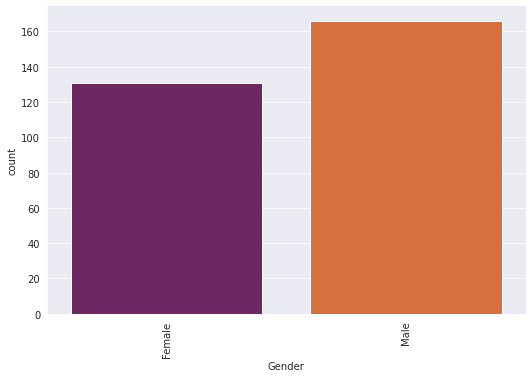

In [32]:
plt.figure(figsize=(30,15))
sns.catplot(x='Gender', data=df, 
            palette="inferno", kind="count", dodge=True, orient="v", height=5, aspect=1.5)
# plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Gender')
plt.show()

##### 
The number of Males who filled the satisfaction form were many compared to the female number

## Relationship between Gender and Customer Satisfaction

<Figure size 720x360 with 0 Axes>

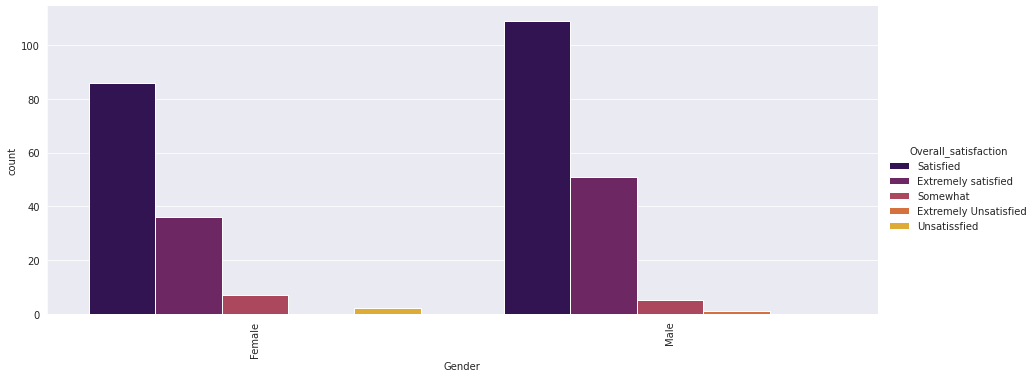

In [33]:
plt.figure(figsize=(10,5))
sns.catplot(x='Gender', hue='Overall_satisfaction', data=df, 
            palette="inferno", kind="count", dodge=True, height=5, aspect=2.5)
plt.xlabel('Gender')
plt.xticks(rotation=90)
plt.show()

###### 
- Both male and female were Satisfied 

## Age

In [34]:
percentage_age = df['Age'].value_counts(normalize=True)*100
total_count = df['Age'].value_counts()
percent_total = pd.DataFrame({'Number_of_people (age)' : total_count, 'Percentage' : percentage_age})
percent_total

,Number_of_people (age),Percentage
28,54,18.181818
22,24,8.080808
29,21,7.070707
24,20,6.734007
30,16,5.387205
25,15,5.050505
26,14,4.713805
23,13,4.377104
27,13,4.377104
40,11,3.703704


<Figure size 2160x1080 with 0 Axes>

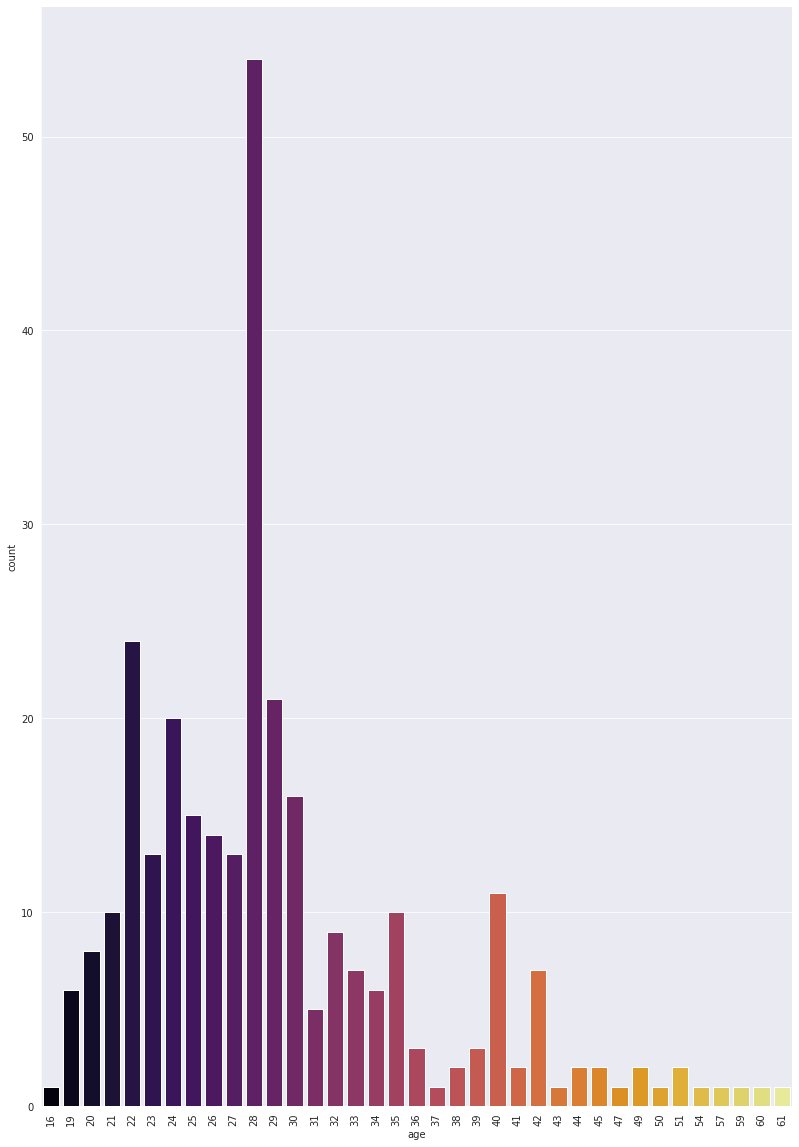

In [35]:
plt.figure(figsize=(30,15))
sns.catplot(x='Age', data=df, 
            palette="inferno", kind="count", dodge=True, orient="v", height=16, aspect=0.7)
# plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('age')
plt.show()

### 
- Most people that participated in the survey were between age 20 and 30

## Relationship between Age and Overall_satisfaction of customers

In [36]:
df.columns

Index(['Serial_number', 'Department_visited', 'Gender', 'Age',
       'Organisation_represented', 'Reception_at_the_gate',
       'Services_at_the_reception_area', 'Reception_area_facilities',
       'Proffessionalism', 'General_presentation', 'Efficiency',
       'Quality_of_advice_received', 'Knowledge_of_staff_on_products',
       'Recomendation_on_KEMRI_products', 'Diagnostic ', 'Payments ',
       'Procurement', 'Scientific', 'Academic Attachments',
       'Information Requesting', 'Others Services',
       'Any_problems_encountered_explain_if_yes', 'Overall_satisfaction',
       'REFER_SOMEBODY_KEMRI', 'Coment', 'How_to_improve_services',
       'problem_encountered'],
      dtype='object')

<Figure size 2160x1080 with 0 Axes>

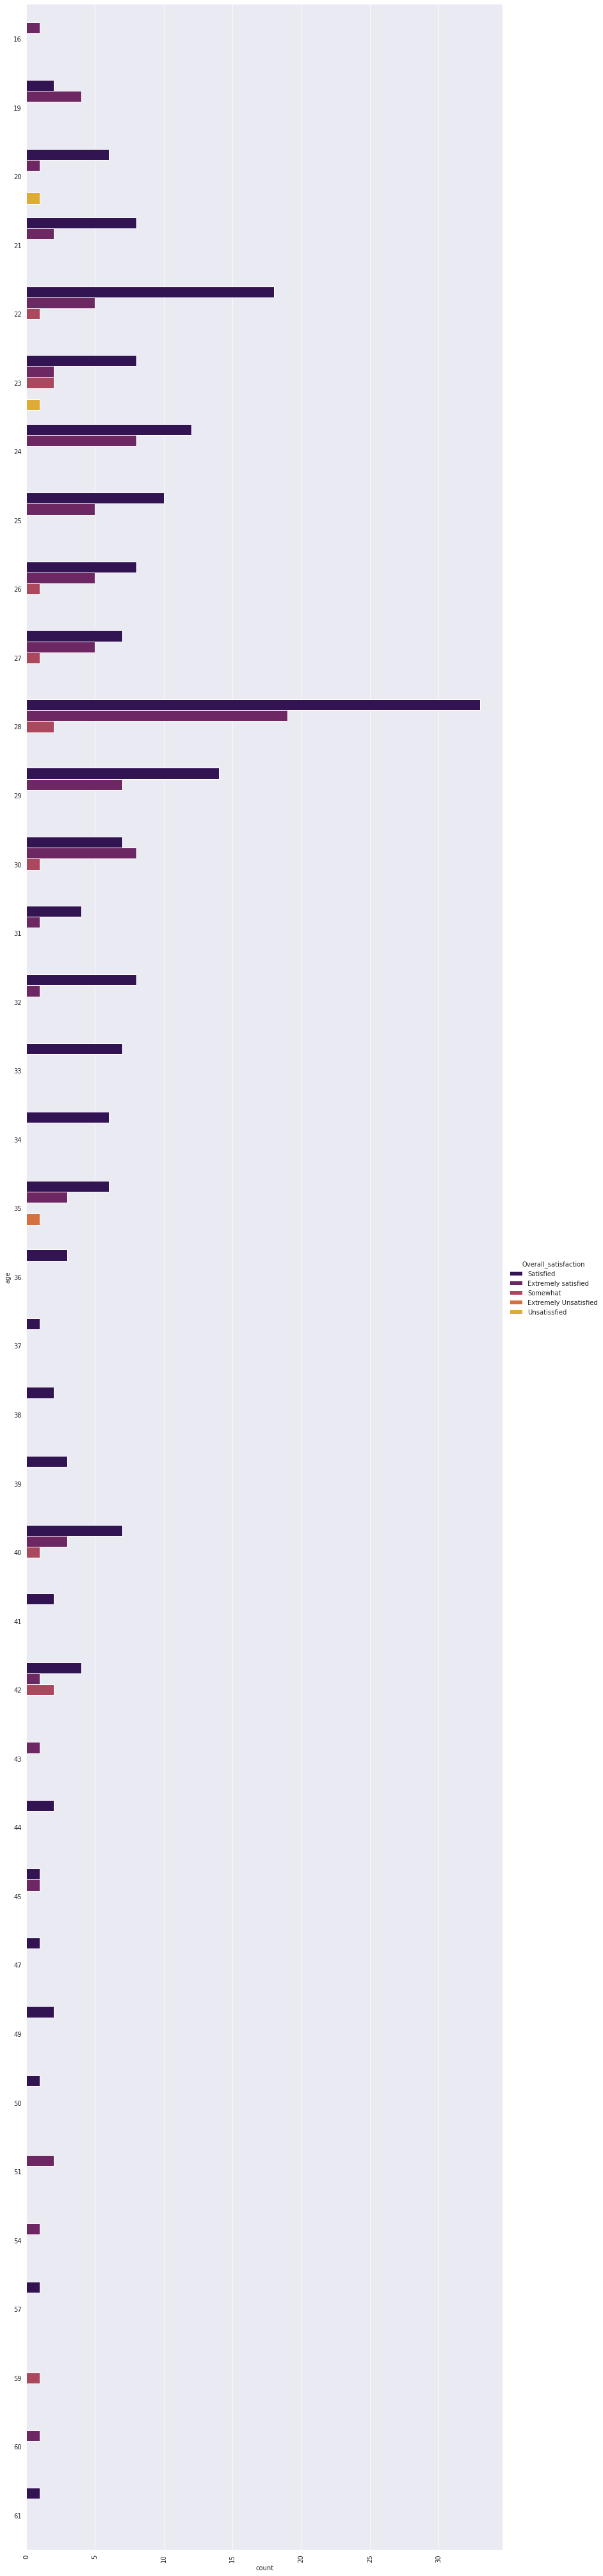

In [37]:
plt.figure(figsize=(30,15))
sns.catplot(y='Age', data=df, 
            palette="inferno", hue='Overall_satisfaction', kind="count", dodge=True, orient="v", height=56, aspect=0.2)
# plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.ylabel('age')
plt.show()

### 
From the observations, most people of different age were satisfied with Kemri

## Organisation_represented

<Figure size 2160x1080 with 0 Axes>

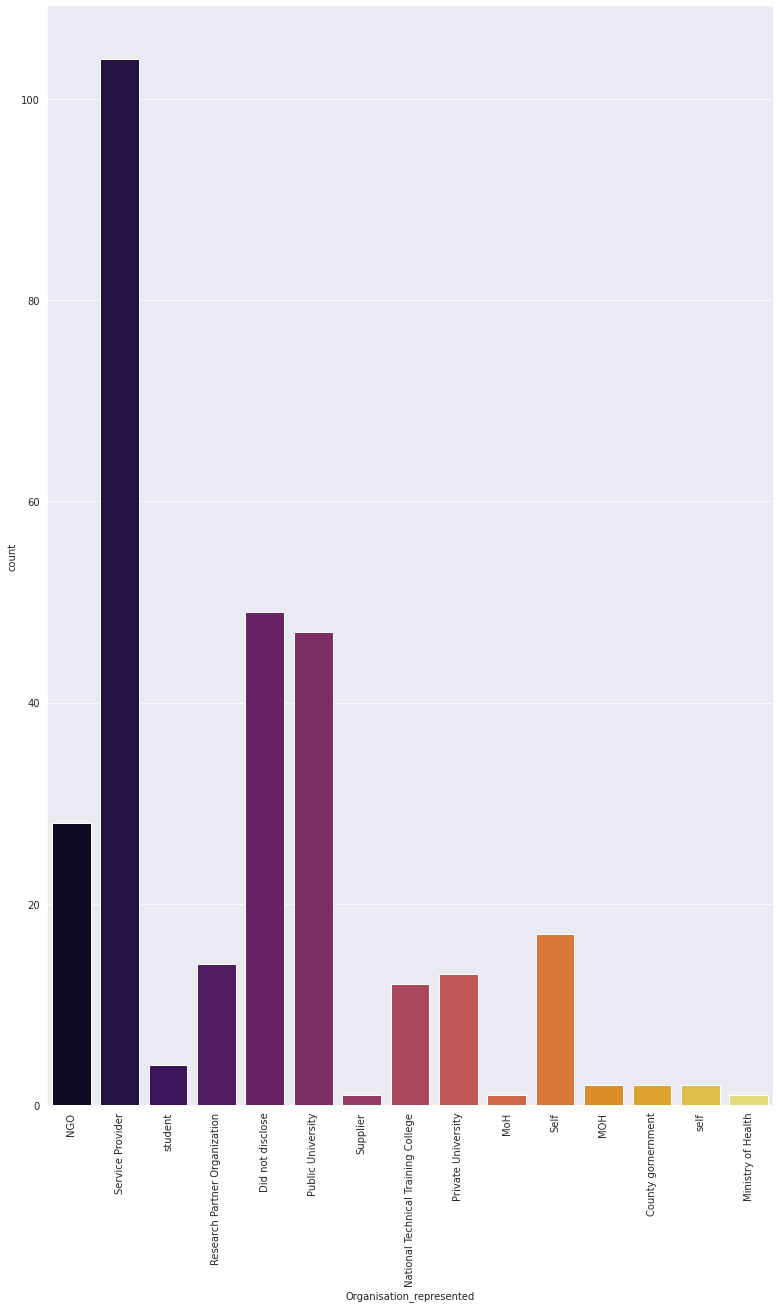

In [38]:
plt.figure(figsize=(30,15))
sns.catplot(x='Organisation_represented', data=df, 
            palette="inferno", kind="count", dodge=True, orient="v", height=16, aspect=0.7)
# plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Organisation_represented')
plt.show()

### 
-The organization most respondents represented is "Service Provider", "Public University" and NGO respectively.

-Some of them did not respond on the organization's they represent.

-A few are Suppliers, MoH, County government, self and ministry of Health who were represented

### Relationship between Organisation_represented and Overall satisfaction

<Figure size 2160x1080 with 0 Axes>

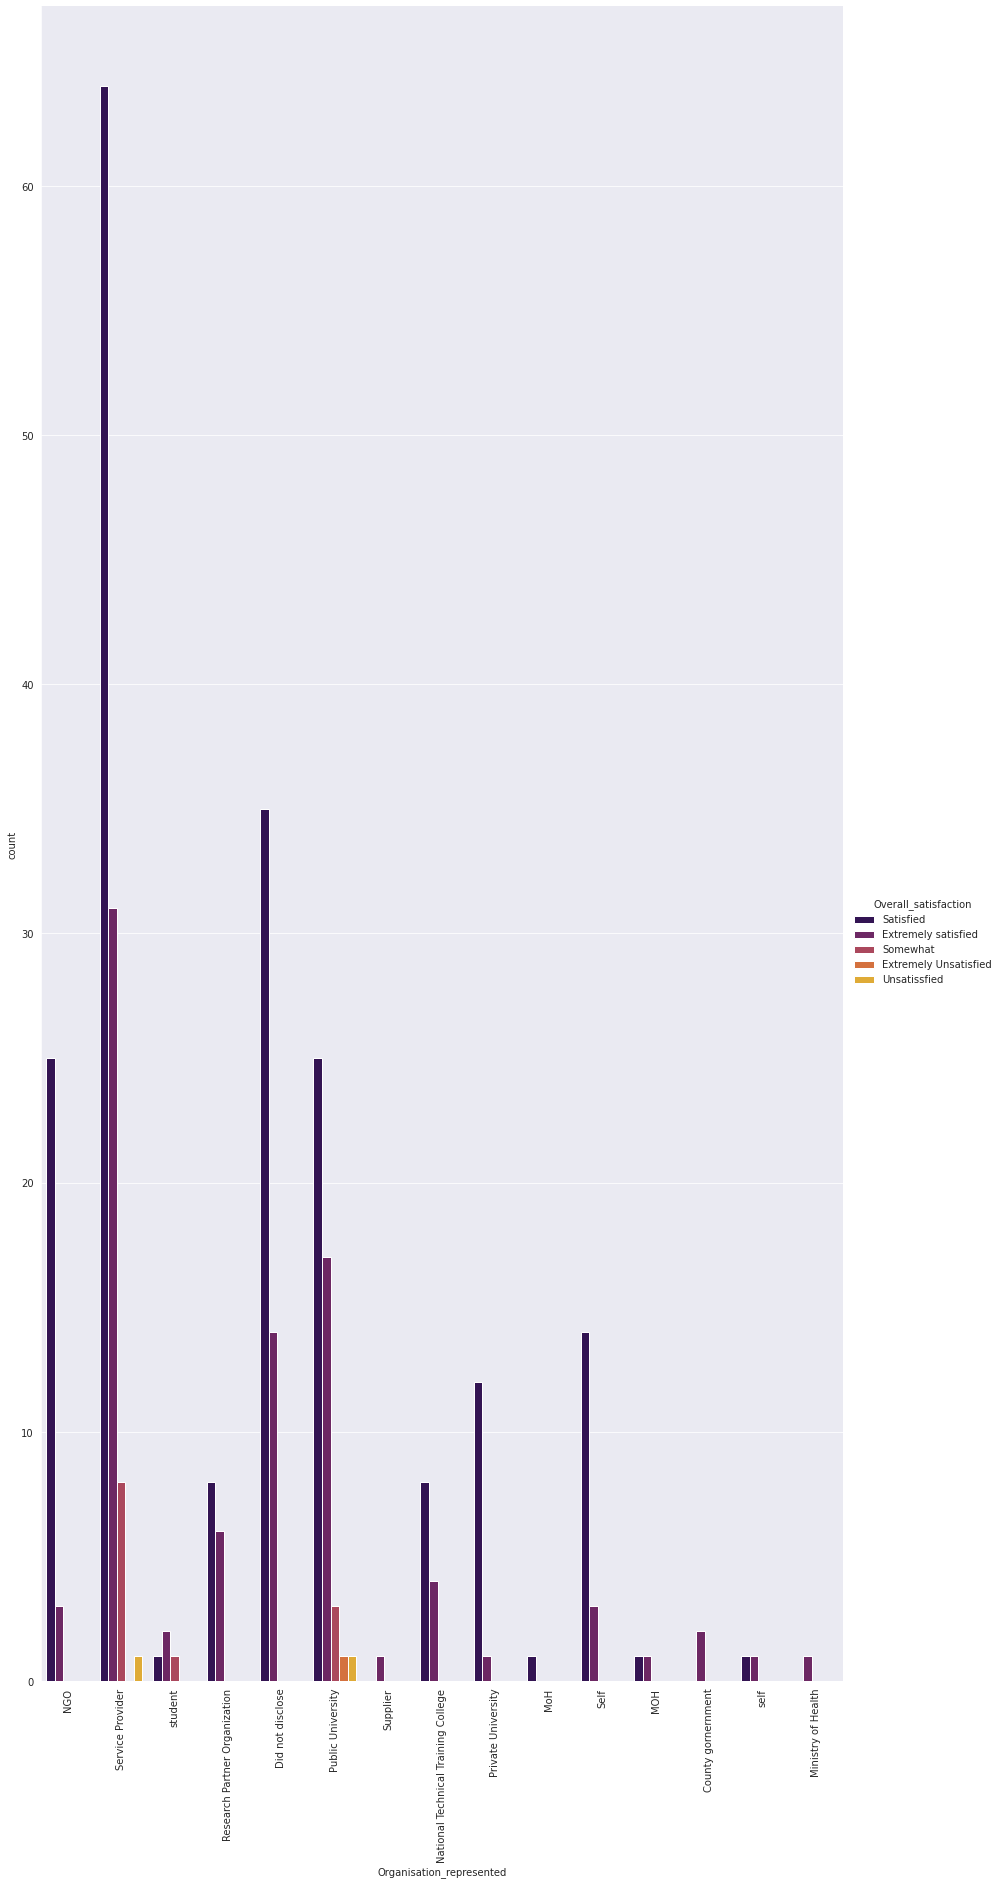

In [39]:
plt.figure(figsize=(30,15))
sns.catplot(x='Organisation_represented', data=df, hue='Overall_satisfaction',
            palette="inferno", kind="count", dodge=True, orient="v", height=24, aspect=0.5)
# plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Organisation_represented')
plt.show()

## Reception at the gate

In [40]:
percentage_gate = df['Reception_at_the_gate'].value_counts(normalize=True)*100
total_count = df['Reception_at_the_gate'].value_counts()
percent_total = pd.DataFrame({'Number_of_people ' : total_count, 'Percentage' : percentage_gate})
percent_total

,Number_of_people,Percentage
Satisfied,273,91.919192
Neutral,23,7.744108
satisfied,1,0.336700


In [41]:
df['Reception_at_the_gate'] = df['Reception_at_the_gate'].replace('satisfied', 'Satisfied')

<Figure size 2160x1080 with 0 Axes>

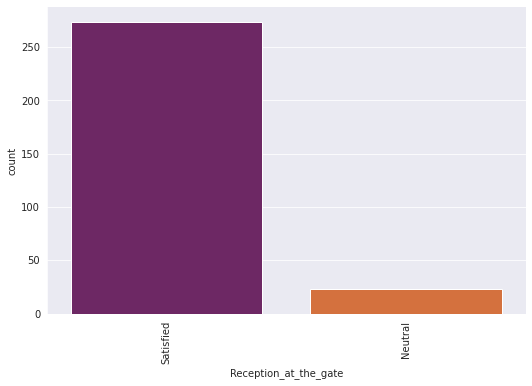

In [42]:
plt.figure(figsize=(30,15))
sns.catplot(x='Reception_at_the_gate', data=df, 
            palette="inferno", kind="count", dodge=True, orient="v", height=5, aspect=1.5)
# plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Reception_at_the_gate')
plt.show()

### Relationship between Reception at the gate and Overall satisfaction

<Figure size 2160x1080 with 0 Axes>

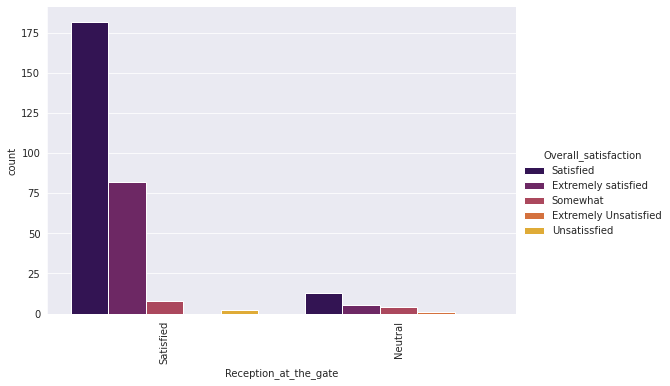

In [43]:
plt.figure(figsize=(30,15))
sns.catplot(x='Reception_at_the_gate', data=df, 
            palette="inferno", kind="count", hue='Overall_satisfaction', dodge=True, orient="v", height=5, aspect=1.5)
# plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Reception_at_the_gate')
plt.show()

## Services_at_the_reception_area

In [44]:
percentage_recp = df['Services_at_the_reception_area'].value_counts(normalize=True)*100
total_count = df['Services_at_the_reception_area'].value_counts()
percent_total = pd.DataFrame({'Number_of_people ' : total_count, 'Percentage' : percentage_recp})
percent_total

,Number_of_people,Percentage
Satisfied,274,92.255892
Neutral,21,7.070707
Dissatisfied,2,0.673401


<Figure size 2160x1080 with 0 Axes>

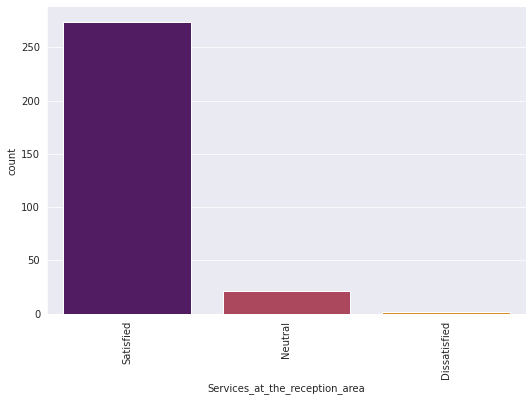

In [45]:
plt.figure(figsize=(30,15))
sns.catplot(x='Services_at_the_reception_area', data=df, 
            palette="inferno", kind="count", dodge=True, orient="v", height=5, aspect=1.5)
# plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Services_at_the_reception_area')
plt.show()

## Relationship between Services_at_the_reception_area and Overall Satisfaction

<Figure size 2160x1080 with 0 Axes>

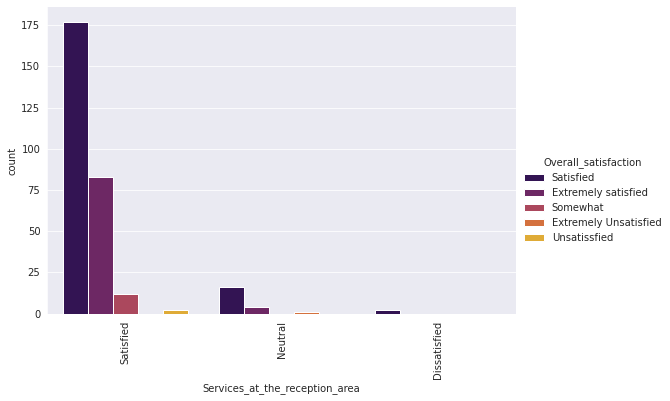

In [46]:
plt.figure(figsize=(30,15))
sns.catplot(x='Services_at_the_reception_area', data=df, 
            palette="inferno", kind="count", hue='Overall_satisfaction', dodge=True, orient="v", height=5, aspect=1.5)
# plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Services_at_the_reception_area')
plt.show()

## Reception_area_facilities

In [47]:
percentage_facil = df['Reception_area_facilities'].value_counts(normalize=True)*100
total_count = df['Reception_area_facilities'].value_counts()
percent_total = pd.DataFrame({'Number_of_people ' : total_count, 'Percentage' : percentage_facil})
percent_total

,Number_of_people,Percentage
Satisfied,257,86.531987
Neutral,37,12.457912
Dissatisfied,3,1.010101


<Figure size 2160x1080 with 0 Axes>

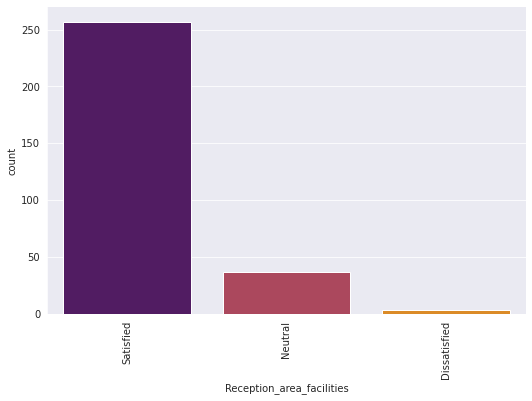

In [48]:
plt.figure(figsize=(30,15))
sns.catplot(x='Reception_area_facilities', data=df, 
            palette="inferno", kind="count", dodge=True, orient="v", height=5, aspect=1.5)
# plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Reception_area_facilities')
plt.show()

## Relationship between Reception_area_facilities and Overal satisfaction

<Figure size 2160x1080 with 0 Axes>

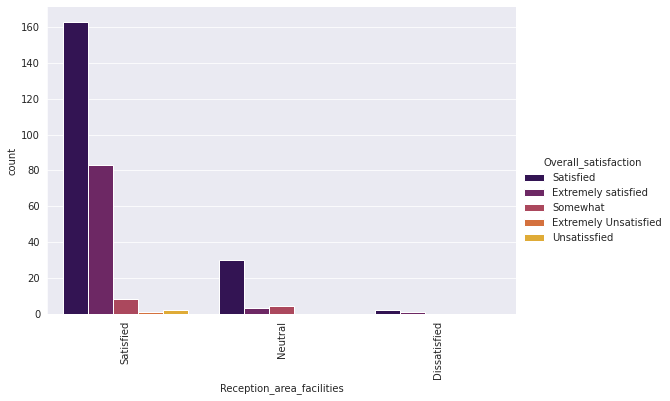

In [49]:
plt.figure(figsize=(30,15))
sns.catplot(x='Reception_area_facilities', data=df, hue='Overall_satisfaction',
            palette="inferno", kind="count", dodge=True, orient="v", height=5, aspect=1.5)
# plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Reception_area_facilities')
plt.show()

## Proffessionalism

In [50]:
percentage_prof = df['Proffessionalism'].value_counts(normalize=True)*100
total_count = df['Proffessionalism'].value_counts()
percent_total = pd.DataFrame({'Number_of_people ' : total_count, 'Percentage' : percentage_prof})
percent_total

,Number_of_people,Percentage
Satisfied,264,88.888889
Neutral,33,11.111111


<Figure size 2160x1080 with 0 Axes>

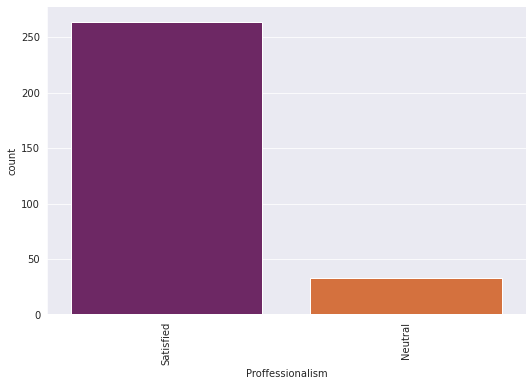

In [51]:
plt.figure(figsize=(30,15))
sns.catplot(x='Proffessionalism', data=df, 
            palette="inferno", kind="count", dodge=True, orient="v", height=5, aspect=1.5)
# plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Proffessionalism')
plt.show()

## Relationship between Proffessionalism and Overal Satisfaction

<Figure size 2160x1080 with 0 Axes>

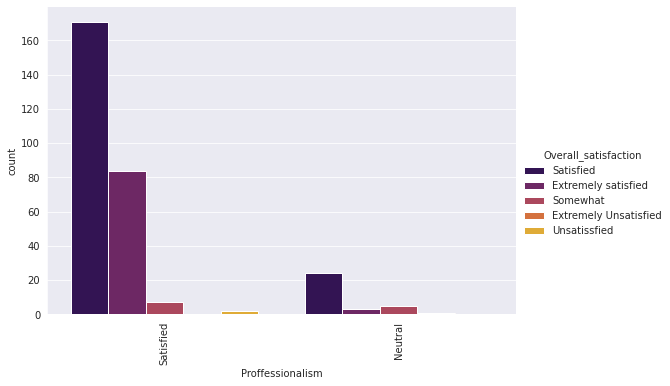

In [52]:
plt.figure(figsize=(30,15))
sns.catplot(x='Proffessionalism', data=df, hue='Overall_satisfaction',
            palette="inferno", kind="count", dodge=True, orient="v", height=5, aspect=1.5)
# plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Proffessionalism')
plt.show()

## General presentation

In [53]:
percentage_gp = df['General_presentation'].value_counts(normalize=True)*100
total_count = df['General_presentation'].value_counts()
percent_total = pd.DataFrame({'Number_of_people ' : total_count, 'Percentage' : percentage_gp})
percent_total

,Number_of_people,Percentage
Satisfied,264,88.888889
Neutral,31,10.437710
Dissatisfied,2,0.673401


<Figure size 2160x1080 with 0 Axes>

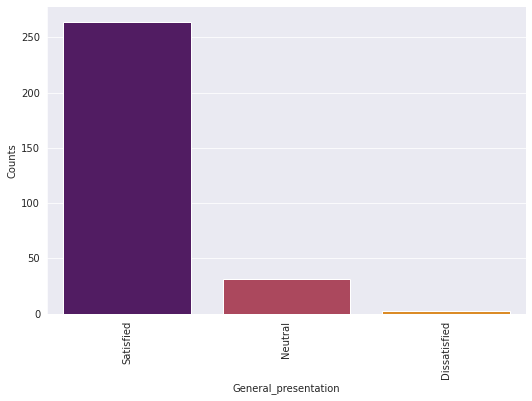

In [54]:
plt.figure(figsize=(30,15))
sns.catplot(x='General_presentation', data=df, 
            palette="inferno", kind="count", dodge=True, orient="v", height=5, aspect=1.5)
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('General_presentation')
plt.show()

## Relationship between general representation and overall satisfaction

<Figure size 2160x1080 with 0 Axes>

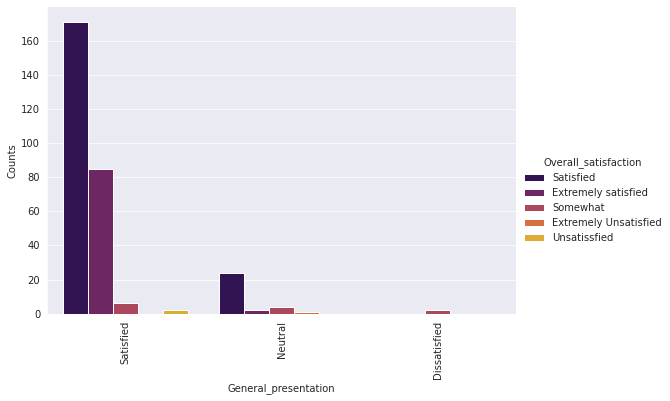

In [55]:
plt.figure(figsize=(30,15))
sns.catplot(x='General_presentation', data=df, hue='Overall_satisfaction',
            palette="inferno", kind="count", dodge=True, orient="v", height=5, aspect=1.5)
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('General_presentation')
plt.show()

The level of customer satisfaction is high when one is satisfied with the general presentation and honesty of the staff

## Efficiency

In [56]:
percentage_efficiency = df['Efficiency'].value_counts(normalize=True)*100
total_count = df['Efficiency'].value_counts()
percent_total = pd.DataFrame({'Number_of_people ' : total_count, 'Percentage' : percentage_efficiency})
percent_total

,Number_of_people,Percentage
Satisfied,262,88.215488
Neutral,35,11.784512


<Figure size 2160x1080 with 0 Axes>

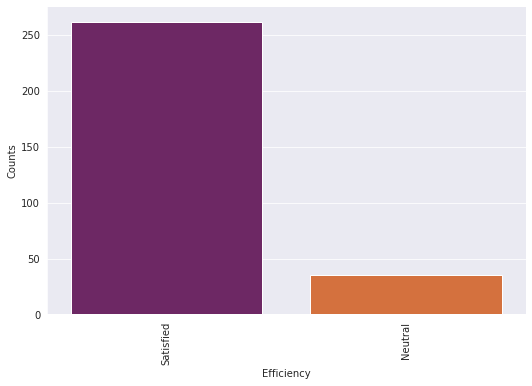

In [57]:
plt.figure(figsize=(30,15))
sns.catplot(x='Efficiency', data=df, 
            palette="inferno", kind="count", dodge=True, orient="v", height=5, aspect=1.5)
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Efficiency')
plt.show()

## Relationship between efficency and overall satisfaction

<Figure size 2160x1080 with 0 Axes>

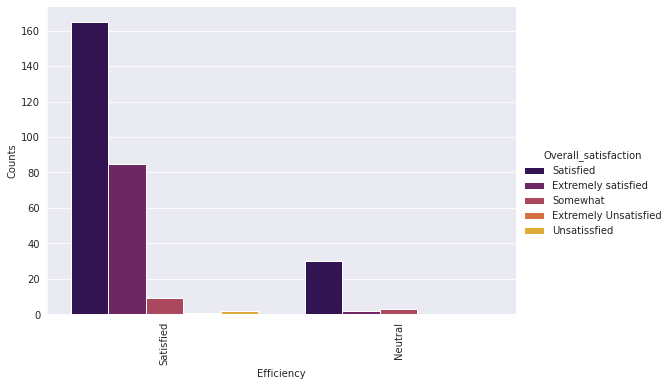

In [58]:
plt.figure(figsize=(30,15))
sns.catplot(x='Efficiency', data=df, hue='Overall_satisfaction',
            palette="inferno", kind="count", dodge=True, orient="v", height=5, aspect=1.5)
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Efficiency')
plt.show()

Provision of efficient services result to high level of customer satisfaction

## Quality of advice received

In [59]:
percentage_advice = df['Quality_of_advice_received'].value_counts(normalize=True)*100
total_count = df['Quality_of_advice_received'].value_counts()
percent_total = pd.DataFrame({'Number_of_people ' : total_count, 'Percentage' : percentage_advice})
percent_total

,Number_of_people,Percentage
Satisfied,268,90.235690
Neutral,27,9.090909
Dissatisfied,2,0.673401


<Figure size 2160x1080 with 0 Axes>

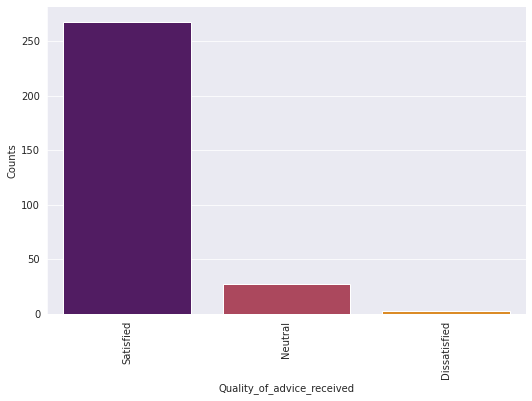

In [60]:
plt.figure(figsize=(30,15))
sns.catplot(x='Quality_of_advice_received', data=df, 
            palette="inferno", kind="count", dodge=True, orient="v", height=5, aspect=1.5)
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Quality_of_advice_received')
plt.show()

## Relationship between quality of advice received  and overall satisfaction

<Figure size 2160x1080 with 0 Axes>

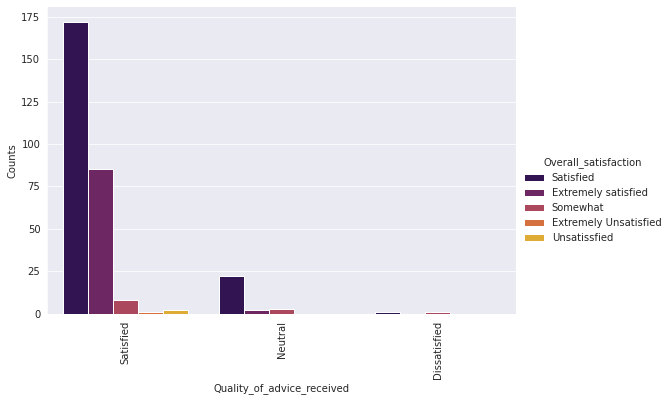

In [61]:
plt.figure(figsize=(30,15))
sns.catplot(x='Quality_of_advice_received', data=df, hue='Overall_satisfaction',
            palette="inferno", kind="count", dodge=True, orient="v", height=5, aspect=1.5)
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Quality_of_advice_received')
plt.show()

Satisfaction of quality of advice received leads to increase in the level of customer satisfaction

## Knowledge of staff on product

In [62]:
percentage_staffknowledge = df['Knowledge_of_staff_on_products'].value_counts(normalize=True)*100
total_count = df['Knowledge_of_staff_on_products'].value_counts()
percent_total = pd.DataFrame({'Number_of_people ' : total_count, 'Percentage' : percentage_staffknowledge})
percent_total

,Number_of_people,Percentage
Satisfied,254,85.521886
Neutral,40,13.468013
Dissatisfied,3,1.010101


<Figure size 2160x1080 with 0 Axes>

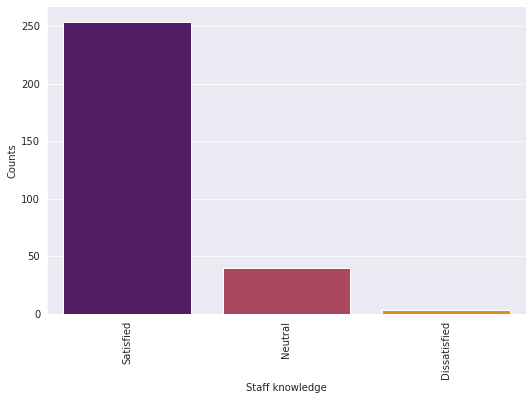

In [63]:
plt.figure(figsize=(30,15))
sns.catplot(x='Knowledge_of_staff_on_products', data=df, 
            palette="inferno", kind="count", dodge=True, orient="v", height=5, aspect=1.5)
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Staff knowledge')
plt.show()

## Relationship between staff knowledge and overall satisfaction

<Figure size 2160x1080 with 0 Axes>

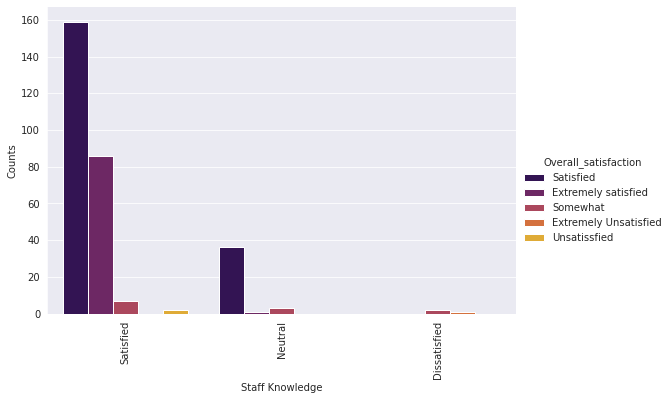

In [64]:
plt.figure(figsize=(30,15))
sns.catplot(x='Knowledge_of_staff_on_products', data=df, hue='Overall_satisfaction',
            palette="inferno", kind="count", dodge=True, orient="v", height=5, aspect=1.5)
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Staff Knowledge')
plt.show()

The more the customer is satistified with the staff knowledge on the product the higher the level of customer satisfaction

## Recommendations on Kemri products

In [65]:
percentage_recommendation = df['Recomendation_on_KEMRI_products'].value_counts(normalize=True)*100
total_count = df['Recomendation_on_KEMRI_products'].value_counts()
percent_total = pd.DataFrame({'Number_of_people ' : total_count, 'Percentage' : percentage_recommendation})
percent_total

,Number_of_people,Percentage
Likely,270,90.909091
Not sure,17,5.723906
Not Sure,7,2.356902
Unlikely,3,1.010101


There is an error since we have two values named 'not sure'

In [66]:
df['Recomendation_on_KEMRI_products'] = df['Recomendation_on_KEMRI_products'].str.replace('Not sure', 'Not Sure')
df['Recomendation_on_KEMRI_products'].unique()

array(['Likely', 'Not Sure', 'Unlikely'], dtype=object)

<Figure size 2160x1080 with 0 Axes>

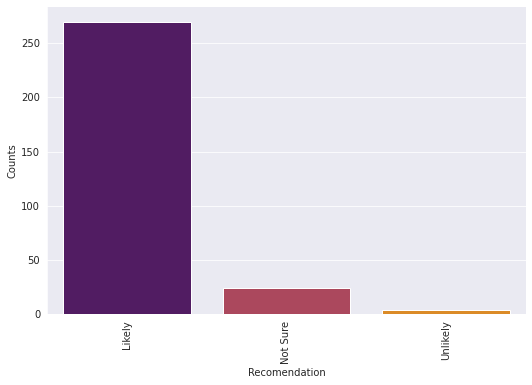

In [67]:
plt.figure(figsize=(30,15))
sns.catplot(x='Recomendation_on_KEMRI_products', data=df, 
            palette="inferno", kind="count", dodge=True, orient="v", height=5, aspect=1.5)
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Recomendation')
plt.show()

## Relationship between recommendation and overall satisfaction

<Figure size 2160x1080 with 0 Axes>

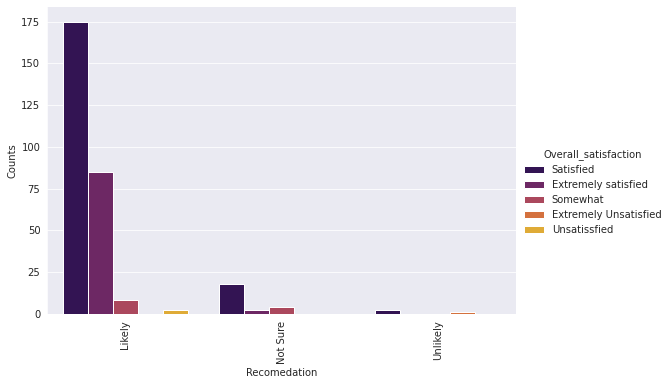

In [68]:
plt.figure(figsize=(30,15))
sns.catplot(x='Recomendation_on_KEMRI_products', data=df, hue='Overall_satisfaction',
            palette="inferno", kind="count", dodge=True, orient="v", height=5, aspect=1.5)
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Recomedation')
plt.show()

When a customer is satisfied he/she is likely to recommend someone else to KEMRI

## Diagnostic

In [69]:
percentage_diagnostic = df['Diagnostic '].value_counts(normalize=True)*100
total_count = df['Diagnostic '].value_counts()
percent_total = pd.DataFrame({'Number_of_people ' : total_count, 'Percentage' : percentage_diagnostic})
percent_total

,Number_of_people,Percentage
0,237,79.79798
1,60,20.20202


<Figure size 2160x1080 with 0 Axes>

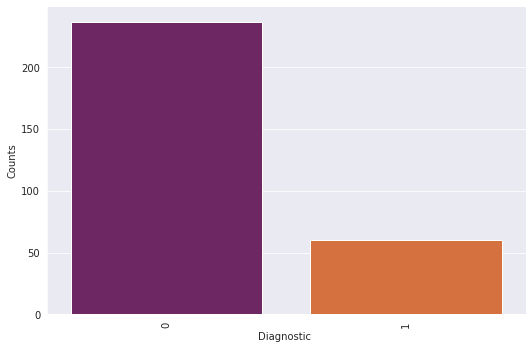

In [70]:
plt.figure(figsize=(30,15))
sns.catplot(x='Diagnostic ', data=df, 
            palette="inferno", kind="count", dodge=True, orient="v", height=5, aspect=1.5)
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Diagnostic ')
plt.show()

## Relationship between diagnostic and overall satisfaction

<Figure size 2160x1080 with 0 Axes>

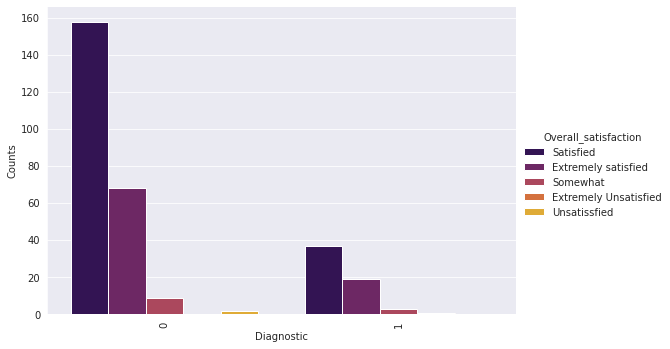

In [71]:
plt.figure(figsize=(30,15))
sns.catplot(x='Diagnostic ', data=df, hue='Overall_satisfaction',
            palette="inferno", kind="count", dodge=True, orient="v", height=5, aspect=1.5)
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Diagnostic')
plt.show()

 ## Payments

In [72]:
percentage_payments = df['Payments '].value_counts(normalize=True)*100
total_count = df['Payments '].value_counts()
percent_total = pd.DataFrame({'Number_of_people ' : total_count, 'Percentage' : percentage_payments})
percent_total

,Number_of_people,Percentage
0,286,96.296296
1,11,3.703704


<Figure size 2160x1080 with 0 Axes>

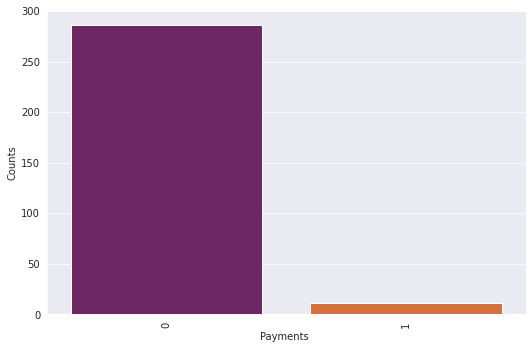

In [73]:
plt.figure(figsize=(30,15))
sns.catplot(x='Payments ', data=df, 
            palette="inferno", kind="count", dodge=True, orient="v", height=5, aspect=1.5)
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Payments ')
plt.show()

## Relationship between payments and overall satisfaction

<Figure size 2160x1080 with 0 Axes>

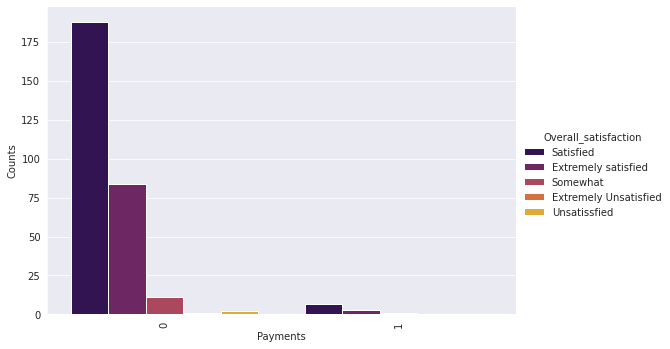

In [74]:
plt.figure(figsize=(30,15))
sns.catplot(x='Payments ', data=df, hue='Overall_satisfaction',
            palette="inferno", kind="count", dodge=True, orient="v", height=5, aspect=1.5)
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Payments')
plt.show()

When a customer is satisfied with the kind of payments on service/product gotten from KEMRI then their is an increase in customer satisfaction level 

# Procurement

In [75]:
percentage_procurement = df['Procurement'].value_counts(normalize=True)*100
total_count = df['Procurement'].value_counts()
percent_total = pd.DataFrame({'Number_of_people ' : total_count, 'Percentage' : percentage_procurement})
percent_total

,Number_of_people,Percentage
0,276,92.929293
1,21,7.070707


<Figure size 2160x1080 with 0 Axes>

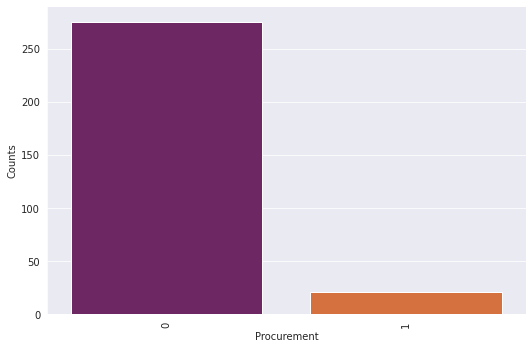

In [76]:
plt.figure(figsize=(30,15))
sns.catplot(x='Procurement', data=df, 
            palette="inferno", kind="count", dodge=True, orient="v", height=5, aspect=1.5)
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Procurement')
plt.show()

## Relationship between procurement and overall satisfaction

<Figure size 2160x1080 with 0 Axes>

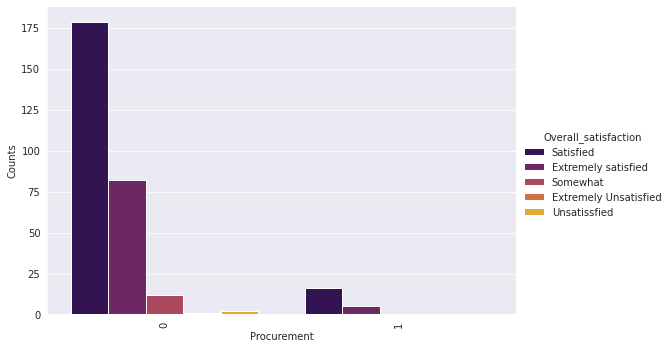

In [77]:
plt.figure(figsize=(30,15))
sns.catplot(x='Procurement', data=df, hue='Overall_satisfaction',
            palette="inferno", kind="count", dodge=True, orient="v", height=5, aspect=1.5)
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.xlabel('Procurement')
plt.show()

When a customer is satisfied with the kind of procurement on service/product gotten from KEMRI then their is an increase in customer satisfaction level 

## Analysis of comments

In [78]:
# find null values
df.isnull().sum()
da = df.copy()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


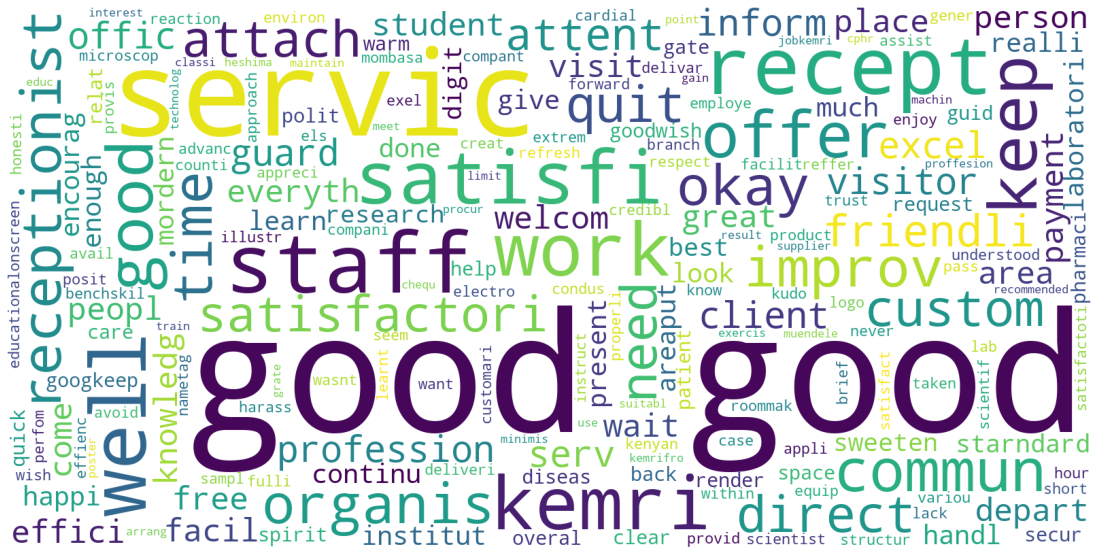

In [80]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

df = da.copy()

# change to lower case
df['Coment'] = df['Coment'].str.lower()

# remove punctuation
df['Coment'] = df['Coment'].str.replace('[^\w\s]','')

# remove numbers
df['Coment'] = df['Coment'].str.replace('\d+', '')

# remove stop words
stop = stopwords.words('english')
df['Coment'] = df['Coment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# remove short words
df['Coment'] = df['Coment'].apply(lambda x: " ".join(x for x in x.split() if len(x) > 3))

# stemming
st = PorterStemmer()
df['Coment'] = df['Coment'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

# visiualize the most common words
from collections import Counter
cnt = Counter() 

for text in df["Coment"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)

# create a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color='white', width=1600, height=800).generate(" ".join(df['Coment']))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



- We can observe positive comments here

## Analysis of Problems encountered

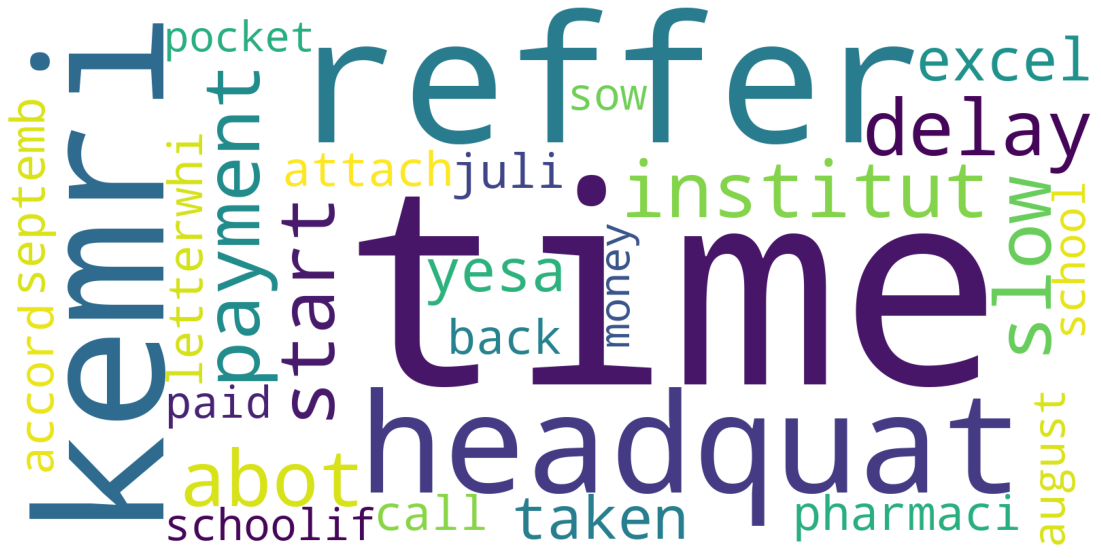

In [81]:
# change to lower case
df['Any_problems_encountered_explain_if_yes'] = df['Any_problems_encountered_explain_if_yes'].str.lower()

# remove punctuation
df['Any_problems_encountered_explain_if_yes'] = df['Any_problems_encountered_explain_if_yes'].str.replace('[^\w\s]','')

# remove numbers
df['Any_problems_encountered_explain_if_yes'] = df['Any_problems_encountered_explain_if_yes'].str.replace('\d+', '')

# remove stop words
stop = stopwords.words('english')

df['Any_problems_encountered_explain_if_yes'] = df['Any_problems_encountered_explain_if_yes'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# remove short words
df['Any_problems_encountered_explain_if_yes'] = df['Any_problems_encountered_explain_if_yes'].apply(lambda x: " ".join(x for x in x.split() if len(x) > 3))

# stemming
st = PorterStemmer()

df['Any_problems_encountered_explain_if_yes'] = df['Any_problems_encountered_explain_if_yes'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
# visiualize the most common words
from collections import Counter
cnt = Counter()

for text in df["Any_problems_encountered_explain_if_yes"].values:
    for word in text.split():
        cnt[word] += 1
    
cnt.most_common(10)

# create a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color='white', width=1600, height=800).generate(" ".join(df['Any_problems_encountered_explain_if_yes']))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

- Some notable problems here is the time taken and delays.

## Analyse how to improve services

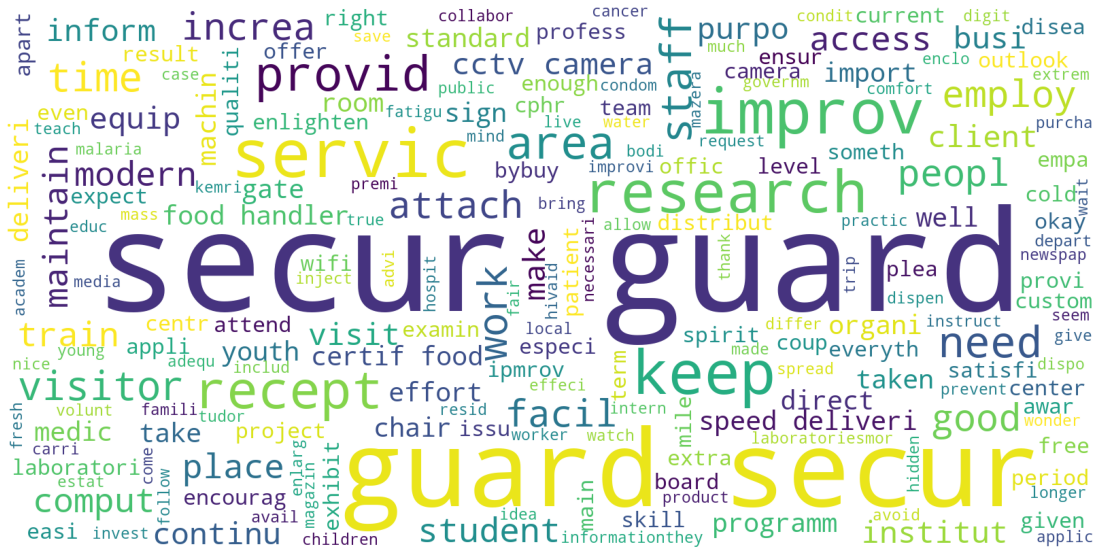

In [84]:
# change to lower case
df['How_to_improve_services'] = df['How_to_improve_services'].str.lower()

# remove punctuation
df['How_to_improve_services'] = df['How_to_improve_services'].str.replace('[^\w\s]','')

# remove numbers
df['How_to_improve_services'] = df['How_to_improve_services'].str.replace('\d+', '')

# remove stop words
stop = stopwords.words('english')

df['How_to_improve_services'] = df['How_to_improve_services'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# remove short words
df['How_to_improve_services'] = df['How_to_improve_services'].apply(lambda x: " ".join(x for x in x.split() if len(x) > 3))

# stemming
st = PorterStemmer()

df['How_to_improve_services'] = df['How_to_improve_services'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
# visiualize the most common words
from collections import Counter

cnt = Counter()

for text in df["How_to_improve_services"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)

# create a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color='white', width=1600, height=800).generate(" ".join(df['How_to_improve_services']))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

- From the analysis the most common words are `Guard`, `Security`
- Furthermore we see suggestions about keeping time

### Lets see what they are saying about the security

In [85]:
# list suggestions with guard and security
da[da['How_to_improve_services'].str.contains('guard')]['How_to_improve_services'].unique()

array(['Add more security guards',
       'put more effort to add security guards',
       'Put  CCTV cameras at reception and add more security guards at the main gate and reception',
       'Reception side, area, table and main gate guards'], dtype=object)

- It is evident that the security there is need to add more security guards

### Suggestions with the word `improv`

In [86]:
da[da['How_to_improve_services'].str.contains('improv')]['How_to_improve_services'].unique()

array(['Keep collaborating with local and international bodies and governmants to improve on products',
       'No improvement', 'By improving medical facilities',
       'Keep on checking the little problem noted and try to improve or work out on the',
       'No need to improve them they are more than'], dtype=object)

- From the analysis, improvement phrase is common on the services offered and prducts. This means that there is need to improve the services offered and products.

### Suggestions about the Staff

In [87]:
da[da['How_to_improve_services'].str.contains('staff')]['How_to_improve_services'].unique()

array(['Employ adequate staff',
       'The staff are extremely wonderful and ii was very nice to visit the place',
       'By employing more staff', 'Increase more training to the staff',
       'By training more staff on modern technology'], dtype=object)

# Modelling

We will use machine learning techniques to build a model that can predict customer satisfaction based on the data we have collected. We will use the "Overall_satisfaction" field as the target variable, and the other fields in the dataset as predictors. Our goal is to build a model that is able to accurately predict overall satisfaction based on the other variables in the dataset.

## Feature Engineering
- We will use the LabelEncoder to encode the categorical variables to numerical values
- We will use get_dummies to encode the categorical variables to numerical values

Drop some columns that are not needed

In [88]:
# drop the columns that are not needed
df = df.drop(['Coment', 'Any_problems_encountered_explain_if_yes', 'How_to_improve_services'], axis=1)

In [89]:
from sklearn.preprocessing import LabelEncoder

cat_cols = [column for column in df.columns if df[column].dtype == 'object' and column not in  ['Overall_satisfaction', 'Serial_Number']]

# binary cols are the columns with only two unique values
binary_cols = [column for column in cat_cols if df[column].nunique() == 2]
binary_cols

['Gender',
 'Reception_at_the_gate',
 'Proffessionalism',
 'Efficiency',
 'problem_encountered']

-  Create a new dataframe with a separate column for each unique category in the categorical variable

In [90]:
data = pd.get_dummies(df, columns=binary_cols, drop_first=True)
dummied_cols = [column for column in data.columns if column not in cat_cols and column not in binary_cols]
data.head()

,Serial_number,Department_visited,Age,Organisation_represented,Services_at_the_reception_area,Reception_area_facilities,General_presentation,Quality_of_advice_received,Knowledge_of_staff_on_products,Recomendation_on_KEMRI_products,...,Academic Attachments,Information Requesting,Others Services,Overall_satisfaction,REFER_SOMEBODY_KEMRI,Gender_Male,Reception_at_the_gate_Satisfied,Proffessionalism_Satisfied,Efficiency_Satisfied,problem_encountered_Yes
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-26,kemri_01,KEMRI CENTRAL LABORATORIES,57,NGO,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,...,1,1,others,Satisfied,YES,0,1,1,1,0
2018-09-14,kemri_02,Research Partners Laboratory,26,Service Provider,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,...,0,1,others,Extremely satisfied,YES,1,1,1,1,0
2018-09-14,kemri_03,ADMINISTRATION OFFICES,40,Service Provider,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,...,0,1,others,Extremely satisfied,YES,0,1,1,1,0
2015-10-03,kemri_04,KEMRI CENTRAL LABORATORIES,59,student,Satisfied,Neutral,Satisfied,Satisfied,Satisfied,Likely,...,1,1,others,Somewhat,YES,0,1,1,1,0
2015-08-26,kemri_05,ANIMAL FACILITIES,33,Service Provider,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Likely,...,0,0,others,Satisfied,YES,0,1,1,1,0


- Encode the categorical variables to numerical values

In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat_cols = [column for column in data.columns if data[column].dtype == 'object' and column not in  ['Serial_number']]

# label encode the categorical columns
for column in cat_cols:
    data[column] = le.fit_transform(data[column])

data.head()

,Serial_number,Department_visited,Age,Organisation_represented,Services_at_the_reception_area,Reception_area_facilities,General_presentation,Quality_of_advice_received,Knowledge_of_staff_on_products,Recomendation_on_KEMRI_products,...,Academic Attachments,Information Requesting,Others Services,Overall_satisfaction,REFER_SOMEBODY_KEMRI,Gender_Male,Reception_at_the_gate_Satisfied,Proffessionalism_Satisfied,Efficiency_Satisfied,problem_encountered_Yes
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-26,kemri_01,6,57,5,2,2,2,2,2,0,...,1,1,7,2,2,0,1,1,1,0
2018-09-14,kemri_02,13,26,11,2,2,2,2,2,0,...,0,1,7,1,2,1,1,1,1,0
2018-09-14,kemri_03,0,40,11,2,2,2,2,2,0,...,0,1,7,1,2,0,1,1,1,0
2015-10-03,kemri_04,6,59,14,2,1,2,2,2,0,...,1,1,7,3,2,0,1,1,1,0
2015-08-26,kemri_05,1,33,11,2,2,2,2,2,0,...,0,0,7,2,2,0,1,1,1,0


### Select features

- We will choose features that represent customer demographics and customer experience

In [92]:
# # ['Gender',
#  'Reception_at_the_gate',
#  'Proffessionalism',
#  'Efficiency',
#  'problem_encountered']

gender_fields = [col for col in data.columns if 'Gender' in col]
demo_fields = [col for col in data.columns if 'Reception' in col or 'Proffessionalism' in col]

cust_demographics = data[['Age', 'Organisation_represented',  *gender_fields]]
cust_interactions =  data[['Services_at_the_reception_area', *demo_fields]]
cust_purpose = data[[ 'Procurement', 'Scientific', 'Academic Attachments', 'Information Requesting', 'Overall_satisfaction' ]]


# combine the dataframes
cust_demographics = pd.concat([cust_demographics, cust_interactions, cust_purpose], axis=1)

### Correlation
* Negative correlation with the target

In [93]:
cust_demographics.corr()['Overall_satisfaction'].sort_values()[cust_demographics.corr()['Overall_satisfaction'].sort_values() < 0]
# data.columns

Proffessionalism_Satisfied        -0.155247
Reception_area_facilities         -0.151670
Gender_Male                       -0.087210
Scientific                        -0.078615
Reception_at_the_gate_Satisfied   -0.059708
Information Requesting            -0.012970
Services_at_the_reception_area    -0.002894
Name: Overall_satisfaction, dtype: float64

* Positive correlation with the target

In [94]:
cust_demographics.corr()['Overall_satisfaction'].sort_values()[cust_demographics.corr()['Overall_satisfaction'].sort_values() > 0]


Procurement                 0.003792
Age                         0.032484
Organisation_represented    0.044562
Academic Attachments        0.082749
Overall_satisfaction        1.000000
Name: Overall_satisfaction, dtype: float64

- Corelation visually

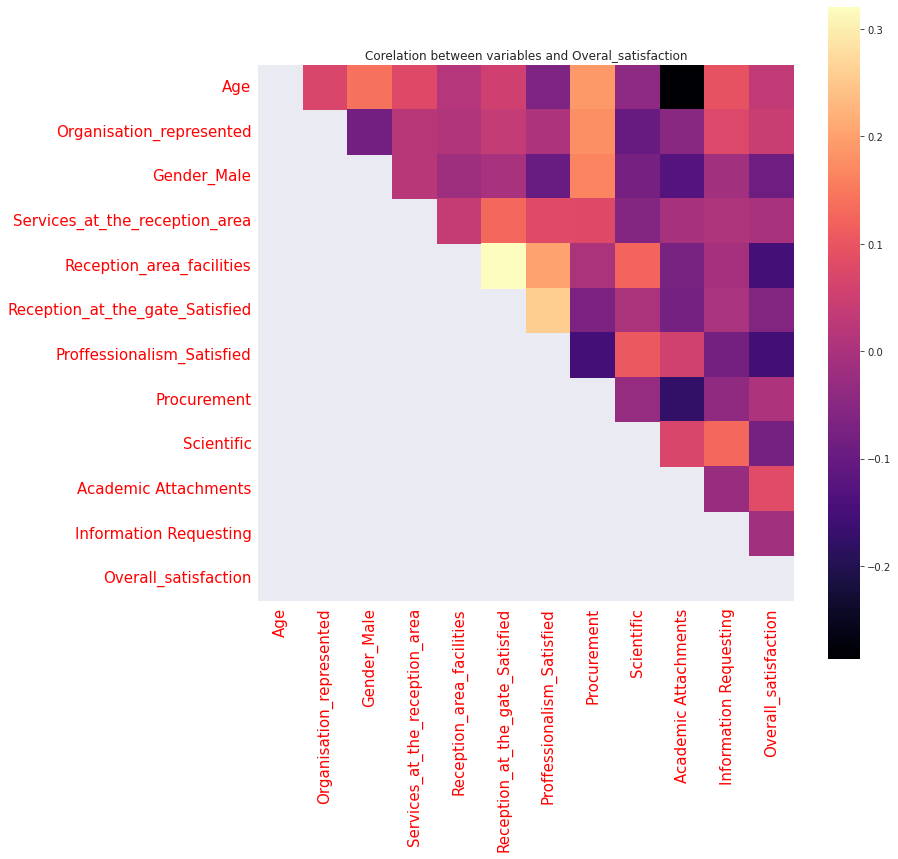

In [96]:
import seaborn as sb
plt.figure(figsize = (12,12))
corr_matrix=cust_demographics.corr()
 
matrix = np.tril(corr_matrix) # take lower correlation matrix

# Draw the heatmap with the mask
sb.heatmap(corr_matrix.T, mask=matrix, square=True, cmap = 'magma')
plt.xticks(size = 15,color = 'red')
plt.title('Corelation between variables and Overal_satisfaction')
plt.yticks(size = 15,  color = 'red');

### Split the data into training and testing sets

In [97]:
# use 80% of the data for training and 20% for testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cust_demographics, data['Overall_satisfaction'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((237, 12), (60, 12))

In [108]:
#pip install catboost
from catboost import CatBoostClassifier
from catboost import CatBoostClassifier

# Initialize the model
model = CatBoostClassifier(iterations=2000, learning_rate=0.1, depth=6)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


0:	learn: 1.1679539	total: 2.46ms	remaining: 4.93s
1:	learn: 1.0225072	total: 9.39ms	remaining: 9.38s
2:	learn: 0.9047716	total: 11.7ms	remaining: 7.78s
3:	learn: 0.7821034	total: 14.1ms	remaining: 7.03s
4:	learn: 0.7069666	total: 19.4ms	remaining: 7.76s
5:	learn: 0.6336965	total: 20.1ms	remaining: 6.67s
6:	learn: 0.5745160	total: 22.7ms	remaining: 6.47s
7:	learn: 0.5098695	total: 25.6ms	remaining: 6.38s
8:	learn: 0.4687851	total: 28.2ms	remaining: 6.24s
9:	learn: 0.4301263	total: 32ms	remaining: 6.36s
10:	learn: 0.3980510	total: 36.1ms	remaining: 6.53s
11:	learn: 0.3645437	total: 39.8ms	remaining: 6.6s
12:	learn: 0.3393173	total: 43.6ms	remaining: 6.66s
13:	learn: 0.3065049	total: 46.1ms	remaining: 6.54s
14:	learn: 0.2780789	total: 47.9ms	remaining: 6.34s
15:	learn: 0.2551576	total: 51.1ms	remaining: 6.33s
16:	learn: 0.2340701	total: 55ms	remaining: 6.42s
17:	learn: 0.2168266	total: 58.8ms	remaining: 6.47s
18:	learn: 0.2036308	total: 62.5ms	remaining: 6.51s
19:	learn: 0.1875758	total:

### Analyse Metrics

- Accuracy

In [109]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 98.33%


- MEAN Absolute error



In [110]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: {:.2f}".format(mae))

Mean Absolute Error: 0.02
